In [39]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [70]:
def f(x):
   return 1.5 - 0.4 * np.sqrt(x ** 3) - np.e ** (-x ** 2) * np.sin(x)

def f_prime(x):
    return 2 * x * np.e ** (-x ** 2) * np.sin(x) - np.e ** (-x ** 2) * np.cos(x) - 3 * np.sqrt(x) / 5

def f_double_prime(x):
    return -4 * x ** 2 * np.e ** (-x ** 2) * np.sin(x) + 4 * x * np.e ** (-x ** 2) * np.cos(x) + 3 * np.e ** (-x ** 2) * np.sin(x) - 3 / 10 * np.sqrt(x)

interval = np.linspace(2, 3, 100)


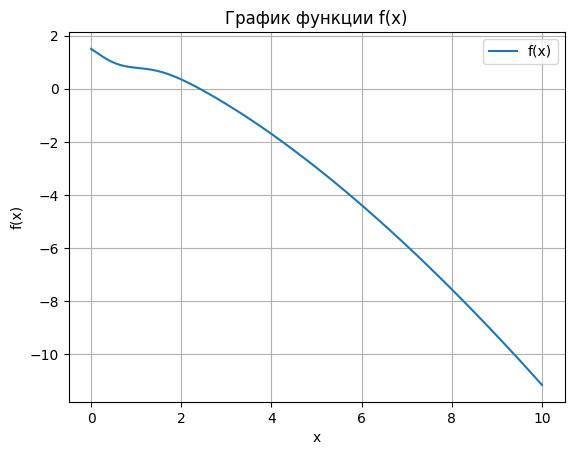

In [56]:
# Генерируем значения x на отрезке от 0 до 10
x_values = np.linspace(0, 10, 400)
# Вычисляем соответствующие значения y
y_values = f(x_values)

# Строим график
plt.plot(x_values, y_values, label='f(x)')
plt.xlabel('x')  # подписываем ось x
plt.ylabel('f(x)')  # подписываем ось y
plt.grid(True)  # добавляем сетку
plt.legend()  # добавляем легенду
plt.title('График функции f(x)')  # добавляем заголовок
plt.show()


In [114]:

def simple_iteration_method(g, x0, epsilon=0.001, max_iterations=1000):
    df = pd.DataFrame(columns=['X', 'Deviation'])
    
    x_prev = x0
    for iteration in range(max_iterations):
        x_next = g(x_prev)
        deviation = x_next - x_prev
        
        df.loc[iteration] = [x_next, deviation]
        
        if abs(deviation) < epsilon:
            return x_next, df
        
        x_prev = x_next

    return None, df  # Если не достигли необходимой точности за максимальное количество итераций

# Функция преобразования для метода простых итераций
def g(k):
    return lambda x: x - f(x) / k

def g_prime(k):
    return lambda x: 1 - f_prime(x) / k

# Начальное приближение
x0 = 2.0
# точность
epsilon = 0.001

# Находим K на отрезке [2, 3]
Q = np.max(np.abs(f_prime(interval)))
minus = -1 if np.max(f_prime(interval)) < 0 else 1 
print("Q[2,3] =", Q)
k = round(Q / 2, 2) * minus
print("K =", k)

# проверим условие сходимости функции
TARGET_Q = 0.3
while True:
    G_prime = g_prime(k)
    q = np.max(np.abs(G_prime(interval)))
    if q < 1:
        print(f'Условие сходимости для k={k} выполнено: q = {q}')
        
        if q > TARGET_Q:
            print(f'Оптимизируем k для достижения меньшего числа итераций путем уменьшения целевого коэффициента q до {TARGET_Q} (выведен методом научного тыка)')

        while q > TARGET_Q:
            print(f'k={k}, q = {q}, увеличиваем k')
            k = round(k * 1.1, 2)
            G_prime = g_prime(k)
            q = np.max(np.abs(G_prime(interval)))
        
        print(f'Найден оптимальный коэффициент k = {k}')
        
        break
    else:
        print(f'Условие сходимости для k={k} НЕ выполнено: q = {q}, увеличиваем k')
        k *= 1.1

# Определяем функцию преобразования g
G = g(k)

# Находим корень методом простых итераций
root, table = simple_iteration_method(G, x0, epsilon)

print('\nТаблица итераций:')
print(table)

if root is not None:
    print('\nКорень найден:', root)
    print('За', table.shape[0], 'итераций')
    
else:
    print('\nНе удалось найти корень с заданной точностью за максимальное количество итераций.')

Q[2,3] = 1.0390038162059896
K = -0.52
Условие сходимости для k=-0.52 выполнено: q = 0.9980842619345953
Оптимизируем k для достижения меньшего числа итераций путем уменьшения целевого коэффициента q до 0.3 (выведен методом научного тыка)
k=-0.52, q = 0.9980842619345953, увеличиваем k
k=-0.57, q = 0.8228137126420871, увеличиваем k
k=-0.63, q = 0.649212406676174, увеличиваем k
k=-0.69, q = 0.5058026321825937, увеличиваем k
k=-0.76, q = 0.36711028448156524, увеличиваем k
Найден оптимальный коэффициент k = -0.84

Таблица итераций:
          X  Deviation
0  2.419018   0.419018
1  2.410876  -0.008142
2  2.411659   0.000783

Корень найден: 2.411658975773383
За 3 итераций


In [67]:
def newton_method(f, f_prime, x0, epsilon=1e-6, max_iterations=1000):
    df = pd.DataFrame(columns=['Отклонение', 'X', 'Y'])
    
    x_prev = x0
    for iteration in range(max_iterations):
        delta_x = -f(x_prev) / f_prime(x_prev)
        x_next = x_prev + delta_x
        deviation = x_next - x_prev
        y = f(x_next)
        
        df.loc[iteration] = [deviation, x_next, y]

        if abs(deviation) < epsilon:
            return x_next, df
        
        x_prev = x_next

    return None, df

# Находим начальное приближение - точка где f(x)f(x)'' > 0
x0 = f(interval) * f_double_prime(interval)
x0 = interval[np.where(x0 > 0)][0]

print('Найдено начальное приближение x0 =', x0)

# точность
epsilon = 1e-6

# Находим корень методом Ньютона
root, table = newton_method(f, f_prime, x0, epsilon)

print('\nТаблица итераций:')
print(table)

if root is not None:
    print('\nКорень найден:', root)
    print('За', table.shape[0], 'итераций')

else:
    print('\nНе удалось найти корень с заданной точностью за максимальное количество итераций.')
    
# Используем начальное приближение в начале интервала
x0 = interval[0]
# Находим корень методом Ньютона
root, table = newton_method(f, f_prime, x0, epsilon)

print('\n\nНачальное приближение x0 =', x0)
print('\nТаблица итераций:')
print(table)

if root is not None:
    print('\nКорень найден:', root)
    print('За', table.shape[0], 'итераций')

else:
    print('\nНе удалось найти корень с заданной точностью за максимальное количество итераций.')


Найдено начальное приближение x0 = 2.4124124124124124

Таблица итераций:
     Отклонение         X             Y
0 -8.213397e-04  2.411591 -8.591125e-08
1 -9.338671e-08  2.411591 -1.161831e-15

Корень найден: 2.411590979283026
За 2 итераций


Начальное приближение x0 = 2.0

Таблица итераций:
     Отклонение         X             Y
0  4.545782e-01  2.454578 -3.977764e-02
1 -4.274275e-02  2.411835 -2.249393e-04
2 -2.444955e-04  2.411591 -7.616463e-09
3 -8.279200e-09  2.411591  1.548241e-16

Корень найден: 2.411590979283025
За 4 итераций
